In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")

In [3]:
target = heart.HeartDisease
feature = heart.drop("HeartDisease", axis = 1)

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(feature, target,
                                                     train_size=0.7, random_state=0)

In [7]:
ct.fit(x_train, y_train)
x_train_trans = ct.fit_transform(x_train, y_train)
x_test_trans = ct.fit_transform(x_test, y_test)

# 
# 
### 나이브 베이즈
- 속도가 빠르지만, 성능이 좋지 않음
- 베이즈 정리를 적용한 확률적 분류 알고리즘
- 모든 특성들이 독립임을 가정 (naive 가정)

### ```sklearn.naive_bayes.GaussianNB``` : 연속적인 어떤 데이터에도 적용
- 클래스별로 각 변수의 평균과 분산을 저장
- 대부분 고차원 데이터셋에 사용

### ```sklearn.naive_bayes.BernoulliNB(alpha)``` : 이진 데이터
- ```alpha``` : 알고리즘이 모든 변수에 양의 값을 가진 가상의 데이터를 ```alpha```개수 만큼 추가 => ```alpha```가 크면 더 완만해지고, 모형의 복잡도는 감소

### ```sklearn.naive_bayes.MultinomialNB(alpha)``` : 카운트 데이터 (변수가 어떤 것의 빈도를 헤아린 정수 카운트)
- ```alpha``` : 알고리즘이 모든 변수에 양의 값을 가진 가상의 데이터를 ```alpha```개수 만큼 추가 => ```alpha```가 크면 더 완만해지고, 모형의 복잡도는 감소
- 클래스별로 변수의 평균을 계산
- ```MultinomialNB().coef_``` : 변수 카운트 수를 로그 변환
- ```MultinomialNB().intercept_``` : 클래스 카운트 수를 로그 변환
- ```.coef_``` $\times x$ + ```.intercept_``` = $x$가 클래스에 속할 확률
# 
- ```BernoulliNB```, ```MultinomialNB```는 대부분 텍스트 데이터 같은 희소한 데이터를 분류할 때 사용
- ```MultinomialNB```는 보통 0이 아닌 변수가 비교적 많은 데이터셋에서 ```BernoulliNB```보다 성능이 높음
# 

- 나이브 베이즈는 조건부 확률 모델
- N개의 특성을 나타내는 벡터 x를 입력 받아 k개의 가능한 확률적 결과를 출력
\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

- 위의 식에 베이즈 정리를 적용하면 다음과 같음
\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

- 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

- 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음
\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}
- 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음
\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}
- 위의 식을 통해 나온 값들 중 가장 큰 값을 갖는 클래스가 예측 결과
\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}



# 
# 
## 결정트리 

- 노드 : 가지
- 리프 : 마지막 노드
- 루트노드 : 최상위 노드
- 순수노드 : 변수 하나로만 이루어진 리프노드
- **데이터의 범위에 영향을 받지않아, 변수의 정규화, 표준화가 필요 없음**

#### 결정트리 복잡도 제어 
- **사전 가지치기** : 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수를 지정
- **가지치기** : 트리를 생성한 후, 데이터 포인트가 적은 노드를 삭제

# 
### 분류나무
### ```sklearn.tree.DecisionTreeClassifier(max_depth, max_leaf_nodes, min_samples_leaf, ...)```
- ```max_depth``` : 트리의 깊이
- ```max_leaf_nodes``` : 최대 가지 개수
- ```max_leaf_nodes``` : 리프노드의 최소 샘플 개수
- ```criterion``` : ('gain' : 지니 불순도 / 'entropy' : 엔트로피 불순도)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tree_c = DecisionTreeClassifier(random_state=0)
tree_c.fit(x_train_trans, y_train)
tree_c.score(x_train_trans, y_train), tree_c.score(x_test_trans, y_test)

(1.0, 0.7753623188405797)

In [17]:
tree_c4 = DecisionTreeClassifier(random_state=0, max_depth = 4)
tree_c4.fit(x_train_trans, y_train)
tree_c4.score(x_train_trans, y_train), tree_c4.score(x_test_trans, y_test)

(0.8956386292834891, 0.8297101449275363)

# 
### 트리 시각화
### ```sklearn.tree.export_graphviz(tree, feature_names, filled, rounded, special_characters)```
### ```sklearn.tree.export_text(tree)```
### ```sklearn.tree.plot_tree(tree, class_names, feature_names, impurity, filled, rounded, fontsize)```

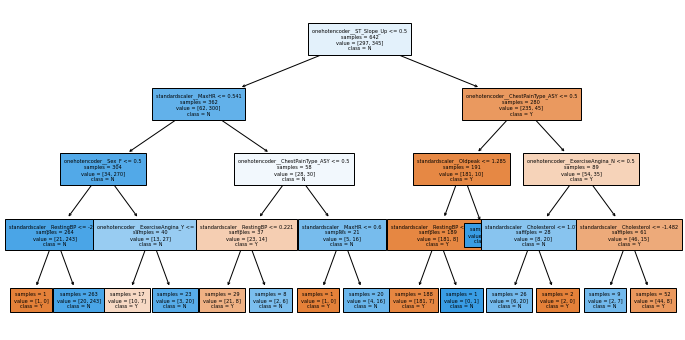

In [23]:
plt.figure(figsize = (12, 6))
sklearn.tree.plot_tree(tree_c4, feature_names = ct.get_feature_names_out(), 
          class_names = ["Y", "N"], impurity = False, filled = True, fontsize=5)
plt.show()

# 
### 변수 중요도

In [24]:
tree_c4.feature_importances_

array([0.        , 0.03053086, 0.03919981, 0.        , 0.07014277,
       0.01741491, 0.02007991, 0.        , 0.08660127, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04039534, 0.01965615, 0.        , 0.        , 0.67597897])

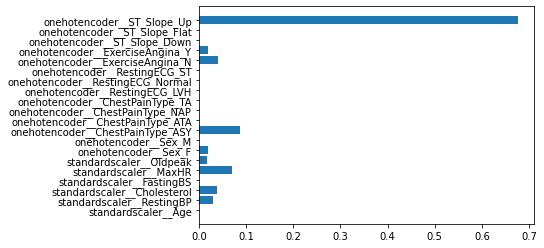

In [25]:
plt.barh(np.arange(x_train_trans.shape[1]), 
         tree_c4.feature_importances_,
         align = "center")
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
# 
### 회귀나무
### ```sklearn.tree.DecisionTreeRegressormax_depth, max_leaf_nodes, min_samples_leaf, criterion, ...)```
- ```max_depth``` : 트리의 깊이
- ```max_leaf_nodes``` : 최대 가지 개수
- ```max_leaf_nodes``` : 리프노드의 최소 샘플 개수
- ```criterion``` : ('squared_error' : MSE / 'absolute_error' : MAE)
- 훈련 데이터 범위 밖의 포인트에 대해 예측 불가

In [26]:
ram = pd.read_csv("C:/Users/이찬솔/Documents/Machine Learning with Python/data/ram_price.csv")

#### ```plt.semilogy(x, y)``` : y축 로그변환 plot

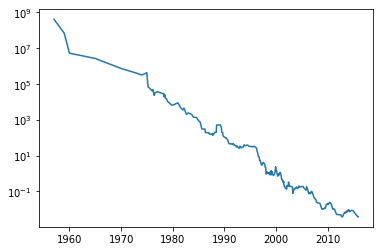

In [27]:
plt.semilogy(ram.date, ram.price)
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
train = ram[ram.date < 2000]
test = ram[ram.date > 2000]

In [30]:
x_train, x_test = np.array(train.date).reshape(-1, 1), np.array(test.date).reshape(-1, 1)
y_train, y_test = np.log(train.price), np.log(test.price)

In [31]:
tree_r = DecisionTreeRegressor().fit(x_train, y_train)

In [32]:
linear_reg = sklearn.linear_model.LinearRegression().fit(x_train, y_train)

In [33]:
tree_pred = np.exp(tree_r.predict(np.array(ram.date).reshape(-1, 1)))
reg_pred = np.exp(linear_reg.predict(np.array(ram.date).reshape(-1, 1)))

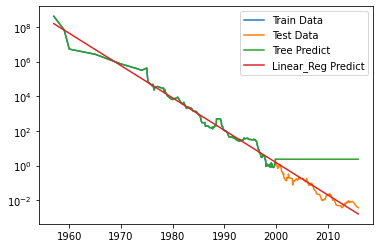

In [34]:
plt.semilogy(train.date, train.price, label = "Train Data")
plt.semilogy(test.date, test.price, label = "Test Data")
plt.semilogy(ram.date, tree_pred, label = "Tree Predict")
plt.semilogy(ram.date, reg_pred, label = "Linear_Reg Predict")
plt.legend()
plt.show()

# 
# 
## 앙상블

#### 모델별 파라미터 & 기본값

|  | **랜덤포레스트** | **GBM** | **엑스트라트리** | **히스토그램 기반 부스팅**|
| -- | -- | -- | -- | -- |
| **트리 개수** | ```n_estimators = 100``` | ```n_estimators = 100``` | ```n_estimators``` | ```max_iter=100``` |
| **학습률** |  | ```learning_rate = 0.1``` |  | ```learning_rate = 0.1``` |
| **노드 분할 기준** | **분류** : ```criterion = 'gini'``` </br> **회귀** : ```criterion = 'squared_error'```   | ```criterion = 'friedman_mse'``` | **분류** : ```criterion = 'gini'``` </br> **회귀** : ```criterion = 'squared_error'```  |  |
| **손실함수** |  | **분류** : ```loss = 'deviance'``` </br> **회귀** : ```loss = 'squared_error'```  |  | **분류** : ```loss = 'auto'``` </br> (이진 분류 : 'binary_crossentropy' / 다중 분류 : 'categorical_crossentropy') </br> **회귀** : ```criterion = 'squared_error'```  |
| **샘플 부트스트래핑** | ```bootstrap = True``` |  | ```bootstrap = False``` |  |
| **샘플 개수** | ```max_samples = None``` (샘플 전체) | ```subsample = 1.0``` | ```max_samples = None``` (샘플 전체)  |  |
| **설명변수 개수** | ```max_features = 'auto'``` </br> (분류는 설명변수 수의 제곱근, 회귀는 전체) | ```max_features = None``` </br> (특성 전체) | ```max_features = 'auto'``` </br> (분류는 특성 개수의 제곱근, 회귀는 전체 특성) |  |
| **OOB점수** | ```oob_score = False``` | ```subsample = 1.0``` </br> (subsample < 1일 때, OOB 점수 계산) | ```oob_score = False``` |  |
| **가지치기** | ```max_depth = None``` </br> ```min_samples_split = 2``` </br> ```min_samples_leaf = 1``` </br> ```max_leaf_nodes = None``` </br> ```min_impurity_decrease = 0.0``` </br> ```ccp_alpha = 0.0```|  ```max_depth = 3``` </br> ```min_samples_split = 2``` </br> ```min_samples_leaf = 1``` </br> ```max_leaf_nodes = None``` </br> ```min_impurity_decrease = 0.0``` </br> ```ccp_alpha = 0.0``` |  ```max_depth = None``` </br> ```min_samples_split = 2``` </br> ```min_samples_leaf = 1``` </br> ```max_leaf_nodes = None``` </br> ```min_impurity_decrease = 0.0``` </br> ```ccp_alpha = 0.0```  |  ```max_depth = None``` </br> ```min_samples_split = 20``` </br> ```min_samples_leaf = 31``` |
| **조기종료** |  | ```n_iter_no_chamge = None``` </br> ```validation_fraction = 0.1``` <b/r> ```tol = 1e-4``` |  | ```early_stopping = 'auto'``` </br> (샘플 개수가 1만개 이상이면 True) </br> ```n_iter_no_change = 10``` </br> ```validation_fraction = 0.1``` </br> ```tol=1e-7```)|
| **병렬화** | ```n_jobs = None``` </br> (1을 의미) |  | ```n_jobs = None``` </br> (1을 의미)|  |


### 랜덤 포레스트
- 텍스트 데이터 등 차원이 매우 높고, 희소한 데이터에는 좋지 못한 성능

# 
### 랜덤 포레스트 분류
### ```sklearn.ensemble.RandomForestClassifier(n_estimators, max_features, max_depth, ...)```
- ```n_estimators``` : 생성 트리 개수 (클수록 과대적합 방지)
- ```max_features``` : 몇 개의 변수로 모형을 생성할지 결정 (트리생성시 변수 선택의 랜덤성, 보통 np.sqrt(설명변수 개수)로 지정)
- ```max_depth``` : 각각 트리의 깊이

In [37]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")

In [38]:
target = heart.HeartDisease
feature = heart.drop("HeartDisease", axis = 1)

In [40]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(feature, target,
                                                     train_size=0.7, random_state=0)

In [42]:
ct.fit(x_train, y_train)
x_train_trans = ct.fit_transform(x_train, y_train)
x_test_trans = ct.fit_transform(x_test, y_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_c = RandomForestClassifier(n_estimators=5, random_state = 0).fit(x_train_trans, y_train)
rf_c.score(x_train_trans, y_train), rf_c.score(x_test_trans, y_test)

(0.9828660436137072, 0.8333333333333334)

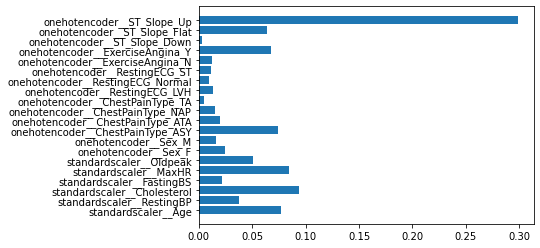

In [45]:
plt.barh(np.arange(x_train_trans.shape[1]), rf_c.feature_importances_)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
### 랜덤 포레스트 회귀
### ```sklearn.ensemble.RandomForestRegressor(n_estimators, max_features, ...)```
- ```n_estimators``` : 생성 트리 개수 (클수록 과대적합 방지)
- ```max_features``` : 몇 개의 변수로 모형을 생성할지 결정 (트리생성시 변수 선택의 랜덤성, 보통 설명변수 개수로 지정)
- ```max_depth``` : 각각 트리의 깊이

# 
# 
## 배깅
- bagging은 bootstrap aggregating의 줄임말
- 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
- 각각의 결과를 결합해 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- 강력하고 복잡한 모델에서 잘 동작학습

# 
### 배깅 분류기
### ```sklearn.ensemble.BaggingClassifier(base_model, n_estimators, oob_score, max_features, max_depth, bootstrap, bootstrap_features...)```
- ```base_estimator``` : 기반 분류기
- ```n_estimators``` : 생성 트리 개수 (클수록 과대적합 방지) (default = 10)
- ```max_features``` : 몇 개의 변수로 모형을 생성할지 결정 (트리생성시 변수 선택의 랜덤성, 보통 np.sqrt(설명변수 개수)로 지정) (default : 1 (모든 설명변수))
- ```max_depth``` : 각각 트리의 깊이
- ```oob_score``` : OOB error, True이면 부트스트랩에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가 (default = False)
- ```bootstrap``` : False로 지정할시 중복을 허용하지 않는 샘플링
- ```bootstrap_features``` : 중복을 허용하여 설명변수를 선택

# 
### 배깅 회귀
### ```sklearn.ensemble.BaggingRegressor(base_model, n_estimators, oob_score, max_features, max_depth, bootstrap, bootstrap_features...)```

In [157]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

In [90]:
from sklearn.linear_model import LogisticRegression

In [112]:
bagging = BaggingClassifier(LogisticRegression(),
                            n_estimators=100, oob_score=True,
                            random_state=0).fit(x_train_trans, y_train)

In [115]:
bagging.score(x_train_trans, y_train), bagging.score(x_test_trans, y_test) \
, bagging.oob_score_

(0.8769470404984424, 0.8333333333333334, 0.8707165109034268)

# 
### 엑스트라 트리 (Extra Tree)
- 설명변수를 무작위로 분할한 다음, 최적의 분할을 탐색
- 무작위성을 증가 => 모델의 편향 증가, 분산 감소

# 
### ```sklearn.ensemble.ExtraTreesClassifier(n_estimators, ...)```
- ```n_estimators``` : 생성할 트리 개수

In [156]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [123]:
extra_c = ExtraTreesClassifier(n_estimators =5, random_state=0) \
    .fit(x_train_trans, y_train)

In [124]:
extra_c.score(x_train_trans,y_train), extra_c.score(x_test_trans, y_test)

(1.0, 0.855072463768116)

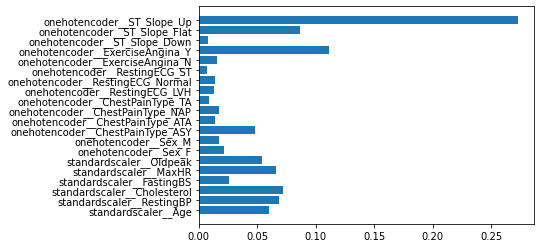

In [126]:
plt.barh(np.arange(x_train_trans.shape[1]), extra_c.feature_importances_)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
# 
## 부스팅 https://for-my-wealthy-life.tistory.com/17
### GBM (Gradient Boosting)
- 랜덤성이 존재하지 않으며, 강력한 사전 가지치기 사용
- 1 ~ 5의 얕은 깊이 사용 => 약학습기에서 연결을 통한 강학습기 생성
- 이전에 생성한 트리의 예측과 반응변수 값 사이의 오차를 감소하는 방향으로 새로운 트리를 추가하는 알고리즘
- 손실함수를 정의하고, 경사 하강법을 사용하여, 다음에 추가될 트리가 예측해야 할 값을 보정
- 훈


# 
### GBM 분류기
### ```sklearn.ensemble.GradientBoostingClassifier(learning_rate, n_estimators, subsample, max_features, deviance, max_depth, loss, n_iter_no_change, validation_fraction)```
- ```learning_rate``` : 트리의 오차를 얼마나 강하게 보정할 것인지 제어 (학습율이 클수록 트리는 강한 보정을 통하여, 복잡한 모델 생성)
- ```n_estimators``` : 앙상블에 트리가 더 많이 추가되어 모델의 목잡도가 증가 => 훈련세트에서의 실수를 정정할 기회가 증가
- ```subsample``` : 트리를 훈련하는데 사용할 훈련 샘플의 비율 (0 ~ 1) (default = 1)
- ```max_features``` : 트리 분할에 사용할 트리 개수 ("sqrt" : 설명변수 개수의 제곱근 / "log2" : log2(설명변수 개수) / 설명변수를 직접 지정하거나, 0 ~ 1사이로 사용할 비율 지정 가능)
- ```loss``` : 손실함수 ("deviance" : 로지스틱 손실, 기본값)
- ```max_depth``` : 생성할 트리의 최대 깊이
- ```validation_fraction``` : 조기 종료를 위한 검증 샘플의 비율 (default = 0.1)
- ```n_iter_no_change``` : 조기 종료 검증을 위한 반복 수,
# 

- ```subsample```이 0보다 작게 설정되면, 랜덤하게 선택된 일부 샘플로 개별 트리를 훈련하는 확률적 그래디언트 부스팅이 됨 => 분산이 감소 & 편향이 증가 => OOB로 훈련된 트리의 손실 값을 계산하고, 이전 트리와 현재 트리의 손실 차이를 ```.oob_improvement_```속성에 저장
-  ```validation_frac```의 비율만큼 검증 데이터로 사용하여, ```n_iter_no_change``` 반복동안 검증 점수가 향상되지 않으면, 훈련이 종료
- ```max_depth```가 커질수록 과적합 가능성

# 
### GBM 회귀
### ```sklearn.ensemble.GradientBoostingRegressor(learning_rate, n_estimators, subsample, max_features, deviance, loss)```

- ```learning_rate``` : 트리의 오차를 얼마나 강하게 보정할 것인지 제어 (학습율이 클수록 트리는 강한 보정을 통하여, 복잡한 모델 생성)
- ```n_estimators``` : **생성할 트리 개수**, 앙상블에 트리가 더 많이 추가되어 모델의 목잡도가 증가 => 훈련세트에서의 실수를 정정할 기회가 증가
- ```subsample``` : 트리를 훈련하는데 사용할 훈련 샘플의 비율 (0 ~ 1) (default = 1)
- ```max_features``` : 트리 분할에 사용할 설명변수 개수 ("sqrt" : 설명변수 개수의 제곱근 / "log2" : log2(설명변수 개수) / 설명변수를 직접 지정하거나, 0 ~ 1사이로 사용할 비율 지정 가능)
- ```loss``` : 손실함수 ("squared_error" : 제곱오차 / "absolute_error" : 오차 절댓값)
- ```max_depth``` : 생성할 트리의 최대 깊이
- ```validation_fraction``` : 조기 종료를 위한 검증 샘플의 비율 (default = 0.1)
- ```n_iter_no_change``` : 조기 종료 검증을 위한 반복 수,

In [155]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [61]:
gbm_c = GradientBoostingClassifier(random_state=0, learning_rate=1) \
    .fit(x_train_trans, y_train)

In [62]:
gbm_c.score(x_train_trans, y_train), gbm_c.score(x_test_trans, y_test)

(1.0, 0.8188405797101449)

In [69]:
gbm_c1 = GradientBoostingClassifier(random_state=0, learning_rate=0.1) \
    .fit(x_train_trans, y_train)

In [70]:
gbm_c1.score(x_train_trans, y_train), gbm_c1.score(x_test_trans, y_test)

(0.9532710280373832, 0.8623188405797102)

In [82]:
gbm_c1.n_estimators_, gbm_c1.feature_importances_, \
    gbm_c1.max_features_, gbm_c1.max_depth, gbm_c1.learning_rate

(100,
 array([0.0243222 , 0.04032961, 0.05645733, 0.01952179, 0.07453497,
        0.0662924 , 0.02005532, 0.01808079, 0.09030731, 0.00823927,
        0.00428453, 0.00361501, 0.00883394, 0.00107602, 0.00092446,
        0.01062171, 0.02187283, 0.00110421, 0.01046053, 0.51906578]),
 20,
 3,
 0.1)

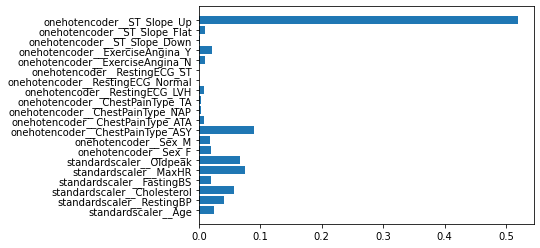

In [83]:
plt.barh(np.arange(x_train_trans.shape[1]), gbm_c1.feature_importances_)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
# 
### Ada Boost

- 이전의 모형이 잘못 분류한 샘플에 가중치를 높여 다음 모형을 훈련 
- 훈련된 각 모형은 성능에 따라 가중치가 부여 
- 예측한 레이블을 기준으로 모형의 가주이를 합산 => 가장 높은 값을 가진 레이블을 선택

### ```sklearn.ensemble.AdaBoostClassifier(n_estimators, max_depth, ...)```
- ```max_depth``` : (default = 1)

# 
### ```sklearn.ensemble.AdaBoostRegressor(n_estimators, max_depth, ...)```
- ```max_depth``` : (default = 3)

In [154]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [132]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0) \
    .fit(x_train_trans, y_train)

In [133]:
ada.score(x_train_trans, y_train), ada.score(x_test_trans, y_test)

(0.9096573208722741, 0.8478260869565217)

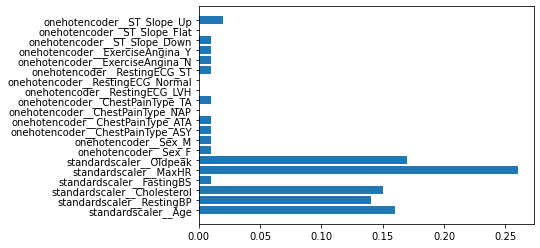

In [134]:
plt.barh(np.arange(x_train_trans.shape[1]), ada.feature_importances_)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
# 
### 히스토그램 기반 부스팅 (HistGradientBoosting)
- 입력 변수를 256개의 구간으로 나눔 => 노드를 분할할 때 최적의 분할을 빠르게 탐색
- 256개의 구간 중 하나를 누락된 값을 위해서 아용 => 결측치 전처리 필요 없음
- 샘플 크기가 1만 개보다 많은 경우 : GBM < HGBM

# 
### ```sklearn.ensemble.HistGradientBoostingClassifier(max_iter, ...)```
- ```max_iter``` : 부스팅 횟수(트리 개수) (default = 100)

In [152]:
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

In [136]:
hgbm_c = HistGradientBoostingClassifier(random_state=0) \
    .fit(x_train_trans, y_train)

In [137]:
hgbm_c.score(x_train_trans, y_train), hgbm_c.score(x_test_trans, y_test)

(1.0, 0.8514492753623188)

In [138]:
from sklearn.inspection import permutation_importance

# 
#### 변수 중요도 계산
### ```sklearn.inspection.permutation_importance(평가모형, x, y, n_repeats, ...)```
- n번씩 변수를 섞어서, 데이터(x, y)에서 훈련한 평가모형의 변수 중요도를 출력
- ```n_repeats``` : 반복 횟수

In [139]:
result = permutation_importance(hgbm_c, x_train_trans, y_train,
                                n_repeats=10, random_state=0)

In [143]:
result.importances_mean, result.importances_std

(array([0.03161994, 0.02274143, 0.05      , 0.01557632, 0.055919  ,
        0.05514019, 0.03520249, 0.        , 0.01557632, 0.01510903,
        0.00015576, 0.        , 0.00140187, 0.        , 0.00124611,
        0.01604361, 0.        , 0.        , 0.05981308, 0.02305296]),
 array([0.00334438, 0.00158848, 0.00299211, 0.00361961, 0.00636346,
        0.00441665, 0.00413287, 0.        , 0.00231034, 0.00261107,
        0.00046729, 0.        , 0.00046729, 0.        , 0.00062305,
        0.00381858, 0.        , 0.        , 0.00714476, 0.00239288]))

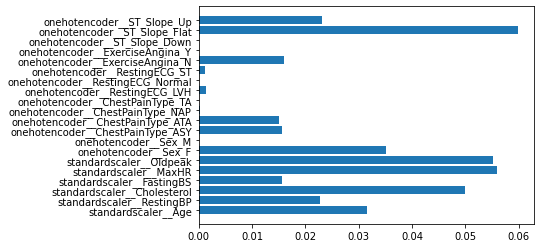

In [144]:
plt.barh(np.arange(x_train_trans.shape[1]), result.importances_mean)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
# 
### XGBoost
https://for-my-wealthy-life.tistory.com/35
- GBM기반이지만, GBM의 느린 수행 시간과, 과적합 규제 부재 등의 문제를 해결

In [149]:
import xgboost as xgb

In [150]:
from xgboost import XGBClassifier, XGBRegressor

### ```xgboost.DMatrix(data, label)``` : xgb를 위한 데이터 객체로 적용

In [161]:
dtrain = xgb.DMatrix(data = x_train_trans, label = y_train)
dtest = xgb.DMatrix(data = x_test_trans, label = y_test)

In [217]:
xgb_c = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)

In [218]:
xgb_c.fit(x_train_trans, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [219]:
xgb_c.score(x_train_trans, y_train), xgb_c.score(x_test_trans, y_test)

(0.9968847352024922, 0.8405797101449275)

In [221]:
xgb_c.feature_importances_

array([0.0089409 , 0.00994528, 0.01170654, 0.02342792, 0.01190893,
       0.01426889, 0.02341383, 0.        , 0.06579416, 0.01635558,
       0.02316692, 0.00498519, 0.01256107, 0.01327945, 0.00596631,
       0.03160408, 0.        , 0.0081603 , 0.01286599, 0.70164865],
      dtype=float32)

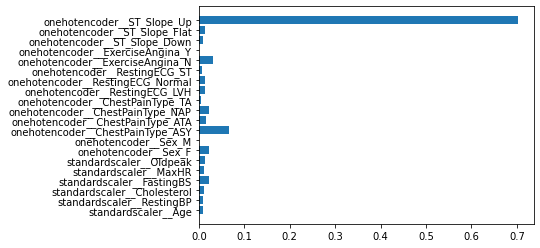

In [223]:
plt.barh(np.arange(x_train_trans.shape[1]), xgb_c.feature_importances_)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()

# 
# 
### LightGBM 
https://for-my-wealthy-life.tistory.com/24

In [226]:
import lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [227]:
lgbmc = LGBMClassifier(n_estimators = 400) \
    .fit(x_train_trans, y_train)

In [228]:
lgbmc.score(x_train_trans, y_train), lgbmc.score(x_test_trans, y_test)

(1.0, 0.8514492753623188)

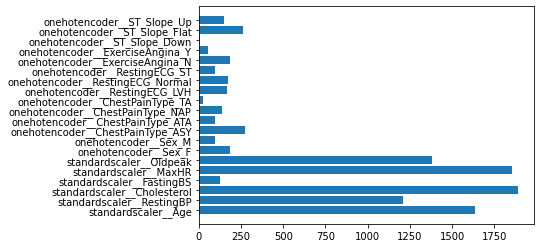

In [239]:
plt.barh(np.arange(x_train_trans.shape[1]), lgbmc.feature_importances_)
plt.yticks(np.arange(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.show()